Starting Portfolio Value: 100000.00
BUY 57575 shares at 1.65
1999-07-20, BUY EXECUTED, 1.65
SELL 57575 shares at 1.48
1999-09-28, SELL EXECUTED, 1.49
BUY 49755 shares at 1.73
1999-10-08, BUY EXECUTED, 1.73
SELL 49755 shares at 3.23
2000-01-10, SELL EXECUTED, 3.24
BUY 49129 shares at 3.2
2000-01-12, BUY EXECUTED, 3.20
SELL 49129 shares at 9.82
2000-10-20, SELL EXECUTED, 9.59
BUY 45440 shares at 10.01
2001-04-02, BUY EXECUTED, 9.99
SELL 45440 shares at 13.88
2001-06-21, SELL EXECUTED, 13.83
BUY 49886 shares at 12.42
2001-10-16, BUY EXECUTED, 12.40
SELL 49886 shares at 20.16
2002-01-16, SELL EXECUTED, 19.88
BUY 293822 shares at 3.31
2002-09-13, BUY EXECUTED, 3.28
SELL 293822 shares at 2.39
2002-10-11, SELL EXECUTED, 2.48
BUY 161477 shares at 4.63
2002-11-06, BUY EXECUTED, 4.79
SELL 161477 shares at 6.08
2003-08-04, SELL EXECUTED, 6.08
BUY 151746 shares at 6.22
2003-11-17, BUY EXECUTED, 6.11
SELL 151746 shares at 6.86
2004-02-02, SELL EXECUTED, 6.92
BUY 132344 shares at 8.0
2004-04-02, BUY

<IPython.core.display.Javascript object>


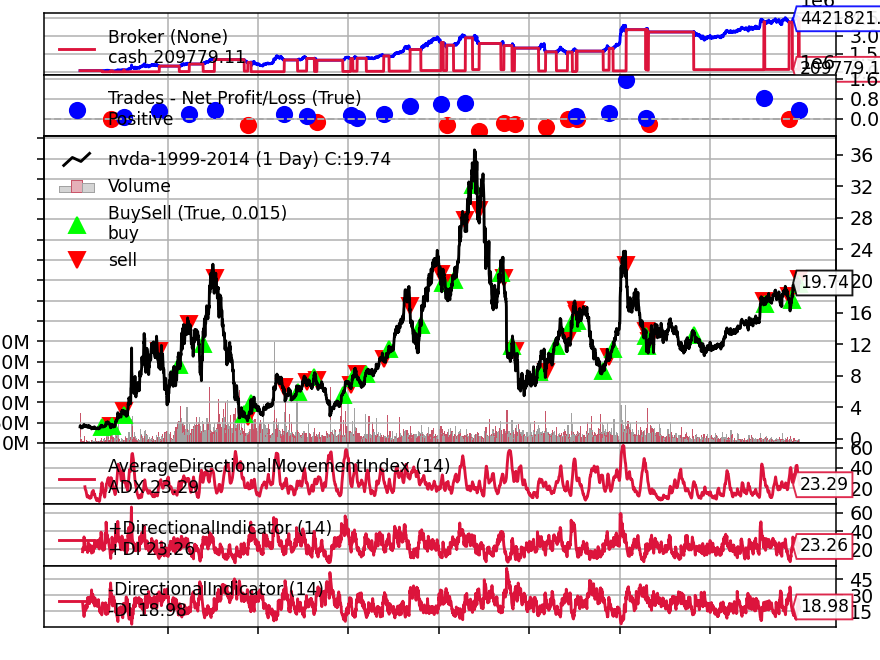

In [20]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)

import datetime  # For datetime objects
import os.path  # To manage paths
import sys  # To find out the script name (in argv[0])
import math 

# Import the backtrader platform
import backtrader as bt

class ADX(bt.Strategy) :
    params =(('period',14),('percent',0.95))
    
    def log(self, txt, dt=None):
        ''' Logging function fot this strategy'''
        dt = dt or self.datas[0].datetime.date(0)
        print('%s, %s' % (dt.isoformat(), txt))
    
    def __init__ (self) :
        self.avgDirIdx = bt.indicators.AverageDirectionalMovementIndex()
        self.plusDM = bt.indicators.PlusDirectionalIndicator(period= self.params.period)
        self.minusDM = bt.indicators.MinusDirectionalIndicator(period= self.params.period)
        self.DIP = self.plusDM.lines.plusDI
        self.DIM = self.minusDM.lines.minusDI
    
    def notify_order(self, order):
        if order.status in [order.Submitted, order.Accepted]:
            # Buy/Sell order submitted/accepted to/by broker - Nothing to do
            return

        # Check if an order has been completed
        # Attention: broker could reject order if not enough cash
        if order.status in [order.Completed]:
            if order.isbuy():
                self.log('BUY EXECUTED, %.2f' % order.executed.price)
            elif order.issell():
                self.log('SELL EXECUTED, %.2f' % order.executed.price)

            self.bar_executed = len(self)

        elif order.status in [order.Canceled, order.Margin, order.Rejected]:
            self.log('Order Canceled/Margin/Rejected')

        # Write down: no pending order
        self.order = None
    
    def next(self) :   
        if not self.position and self.DIP > self.DIM and self.avgDirIdx.adx > 25 and self.data.close[-1] > self.data.close[0] :
            self.numShares = math.floor(self.broker.cash * self.params.percent/self.data.close)
                
            print("BUY {} shares at {}".format(self.numShares,self.data.close[0]))
            self.buy(size = self.numShares)
        
        if self.position and self.DIP < self.DIM and self.avgDirIdx.adx > 25 and self.data.close[-1] < self.data.close[0] :
            print("SELL {} shares at {}".format(self.numShares,self.data.close[0]))
            self.close()

if __name__ == '__main__':
    # Create a cerebro entity
    cerebro = bt.Cerebro()

    # Add a strategy
    cerebro.addstrategy(ADX)
    name = ['orcl-1995-2014.txt','nvda-1999-2014.txt','yhoo-1996-2014.txt','AAPL.txt']

    # Create a Data Feed
    data = bt.feeds.YahooFinanceCSVData(
        dataname= name[1],
        # Do not pass values before this date
        fromdate=datetime.datetime(1999, 1, 1),
        # Do not pass values before this date
        todate=datetime.datetime(2014, 12, 31),
        # Do not pass values after this date
        reverse=False)

    # Add the Data Feed to Cerebro
    cerebro.adddata(data)

    # Set our desired cash start
    cerebro.broker.setcash(100000.0)
    cerebro.broker.setcommission(commission=0.001)
    # Print out the starting conditions
    print('Starting Portfolio Value: %.2f' % cerebro.broker.getvalue())

    # Run over everything
    cerebro.run()

    # Print out the final result
    print('Final Portfolio Value: %.2f' % cerebro.broker.getvalue())
    
    cerebro.plot()

Initial Value : $100k
NVIDIA = $4.42M
Oracle = $285k
Yahoo = $94k
AAPL = $2.6M